In [1]:
import sys
sys.path.append('../')

In [2]:
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from data.get_data import get_data
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
X, y = get_data()
y = np.reshape(y, (-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [4]:
svm_classifier = SVC()
multi_output_svm = MultiOutputClassifier(svm_classifier, n_jobs=-1)  # n_jobs=-1 để tận dụng tất cả các CPU core
multi_output_svm.fit(X_train, y_train)
predictions = multi_output_svm.predict(X_test)
accuracy = multi_output_svm.score(X_test, y_test)

Accuracy: 0.9729432302830752


+ precision = 0.638
+ recall = 0.632
+ f1_score = 0.633


/home/credit-score/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


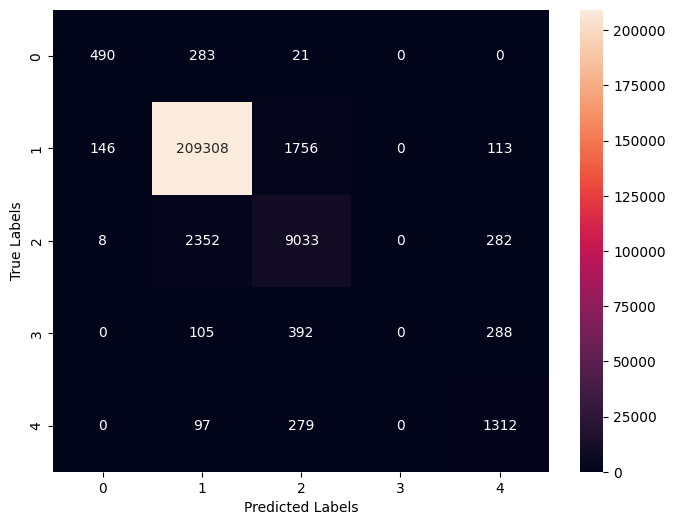

In [5]:
a = precision_recall_fscore_support(y_test, predictions, average='macro')
cf = confusion_matrix(y_test, predictions)

print(f'+ precision = {a[0]:.3f}')
print(f'+ recall = {a[1]:.3f}')
print(f'+ f1_score = {a[2]:.3f}')

plt.figure(figsize=(8,6))
ax = sns.heatmap(data=cf, fmt="d", annot=True)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
plt.show()
